# ベクトルの定義

In [1]:
import numpy as np
x = np.array([[1],[2],[3]])
print(x)

[[1]
 [2]
 [3]]


# 行列の定義

In [2]:
X = np.array([[1,2],[3,4]])
print(X)

[[1 2]
 [3 4]]


# 転置

In [4]:
Xt = X.T
print(Xt)

[[1 3]
 [2 4]]


# 逆行列

In [5]:
X_inv = np.linalg.inv(X)
print(X_inv)

[[-2.   1. ]
 [ 1.5 -0.5]]


# 行列積

In [6]:
XX_inv = np.dot(X, X_inv)
print(XX_inv)

[[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


# 行と列数の確認

In [9]:
X = np.array([[2,3,4],[1,2,3]])
print(X)
print(X.shape)
row, col = X.shape
print(row)
print(col)

[[2 3 4]
 [1 2 3]]
(2, 3)
2
3


# 重回帰分析のサンプル

In [11]:
X = np.array([[1,2,3],[1,2,5],[1,3,4],[1,5,9]])
y = [[1],[5],[6],[8]]

In [18]:
XtX = np.dot(X.T, X)
print(XtX)

[[  4  12  21]
 [ 12  42  73]
 [ 21  73 131]]


In [19]:
XtX_inv = np.linalg.inv(XtX)
print(XtX_inv)

[[ 1.76530612 -0.39795918 -0.06122449]
 [-0.39795918  0.84693878 -0.40816327]
 [-0.06122449 -0.40816327  0.24489796]]


In [20]:
Xty = np.dot(X.T, y)
print(Xty)

[[ 20]
 [ 70]
 [124]]


In [21]:
w = np.dot(XtX_inv, Xty)
print(w)

[[-0.14285714]
 [ 0.71428571]
 [ 0.57142857]]


# Scikit-learnで重回帰分析

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## パラメータの確認

In [36]:
model.coef_

array([[0.        , 0.71428571, 0.57142857]])

In [37]:
model.intercept_

array([-0.14285714])

## 予測精度, 決定係数

In [38]:
model.score(X, y)

0.6923076923076926

## 予測値の計算

In [39]:
x = np.array([[1,2,3]])
model.predict(x)

array([[3.]])

# アイリスデータのサンプル読み込み

In [50]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# pandas dataframe

In [55]:
import pandas as pd
df = pd.DataFrame(iris_dataset["data"], columns=iris_dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 件数

In [56]:
len(df)

150

## 統計量の算出

 - std : 標準偏差

In [57]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 分布の確認

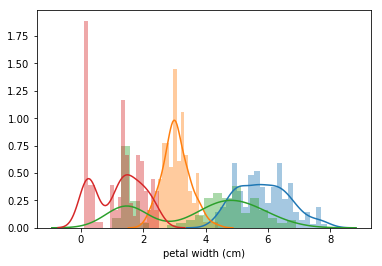

In [71]:
%matplotlib inline
import seaborn as sns
for name in df:
    sns.distplot(df[name], bins=20)

## 相関関係の確認

In [74]:
df["y"] = iris_dataset["target"]
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
y,0.782561,-0.426658,0.949035,0.956547,1.000000


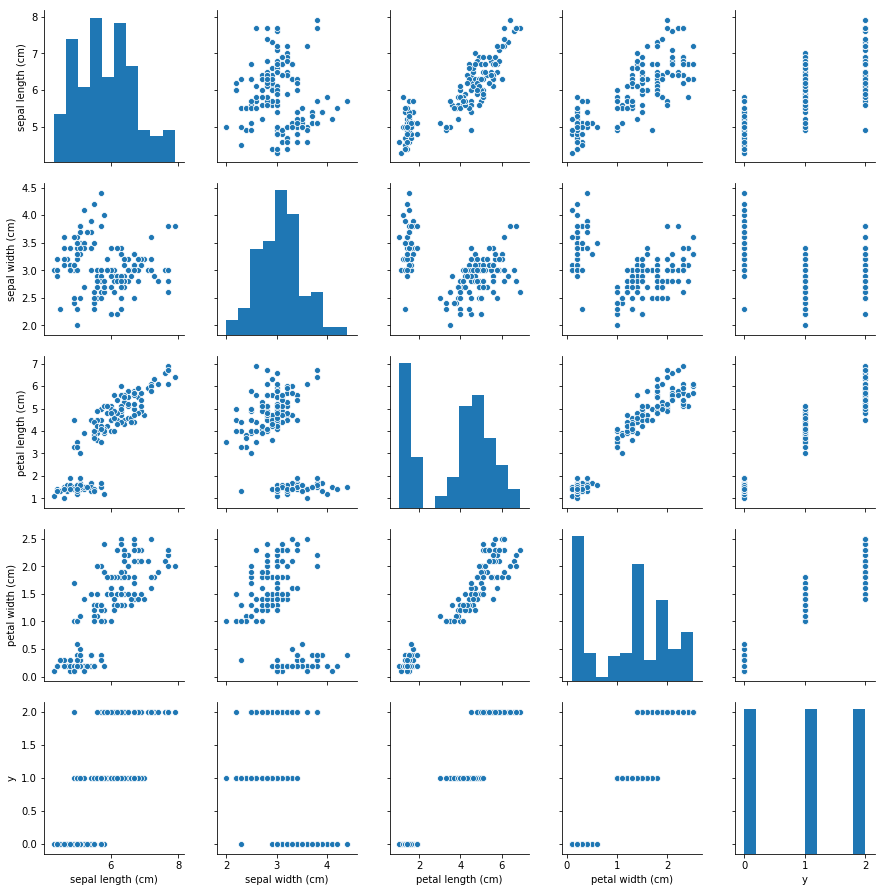

In [75]:
sns.pairplot(df)

## 列データの切り出し

In [88]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## モデルの構築

In [92]:
model = LinearRegression()
model.fit(X, y)
model.score(X,y)

0.9303939218549564

## 訓練データと検証データ

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [96]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8993541715616912

In [97]:
model.score(X_train, y_train)

0.9342243711956324

## 予測値の計算

In [137]:
x_sample = X_test.iloc[0:5,:]
y_sample = y_test.iloc[0:5]
y_pred = model.predict(x_sample)
print(y_pred)
print(y_sample)

[-0.32592601  0.87460472  1.15646699 -0.10325012  1.83913817]
14     0
98     1
75     1
16     0
131    2
Name: y, dtype: int64


## モデルの保存

In [138]:
from sklearn.externals import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

## モデルの読み込み

In [140]:
model_new = joblib.load("model.pkl")
model_new.predict(x_sample)

array([-0.32592601,  0.87460472,  1.15646699, -0.10325012,  1.83913817])

## パラメータの確認

In [141]:
model.coef_

array([-0.23396985,  0.01053874,  0.34586796,  0.47777514])

In [143]:
np.set_printoptions(precision=3, suppress=True)
model.coef_

array([-0.234,  0.011,  0.346,  0.478])

In [144]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 外れ値の除去

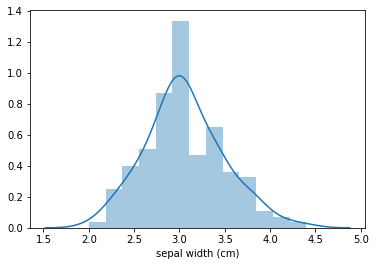

In [190]:
col = "sepal width (cm)"
sns.distplot(df[col])

In [191]:
# 平均
mean = df.mean()[col]
# 標準偏差
sigma = df.std()[col]
sigma

0.435866284936698

## 3σ

In [192]:
low = mean - (3 * sigma)
print(low)
high = mean + (3 * sigma)
print(high)

1.7497344785232403
4.3649321881434275


In [193]:
df2 = df[ (df[col] > low) & (df[col] < high) ]
print(len(df))
print(len(df2))

150
149


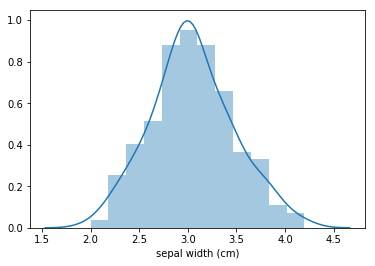

In [174]:
sns.distplot(df2[col])

In [194]:
mean  = df.mean()
sigma = df.std()
cols = df.columns
_df = df
for col in cols:
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    _df = _df[ (_df[col] > low) & (_df[col] < high) ]

print(len(df))
print(len(_df))

150
149


In [201]:
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

0.9329880379345604

## スケーリング

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scalerの学習
scaler.fit(X_train)
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)
X_train2

array([[-0.182,  1.826, -1.19 , -1.195],
       [-0.062, -0.634,  0.742,  1.53 ],
       [ 1.021,  0.596,  1.083,  1.66 ],
       [ 0.059,  0.35 ,  0.571,  0.752],
       [ 1.142, -0.634,  0.571,  0.233],
       [-0.904,  1.826, -1.304, -1.195],
       [-1.025,  1.334, -1.361, -1.325],
       [-0.904,  1.826, -1.247, -1.325],
       [-1.145, -1.617, -0.281, -0.286],
       [-1.025,  1.088, -1.418, -1.195],
       [-1.145,  1.334, -1.361, -1.454],
       [ 2.225,  1.826,  1.651,  1.271],
       [ 1.262,  0.104,  0.912,  1.141],
       [ 0.179, -2.109,  0.685,  0.362],
       [ 0.42 , -0.634,  0.571,  0.752],
       [ 1.021,  0.104,  0.515,  0.362],
       [-0.062, -0.88 ,  0.742,  0.882],
       [ 2.225, -0.634,  1.651,  1.011],
       [-0.182, -0.142,  0.23 , -0.027],
       [-1.265,  0.842, -1.247, -1.325],
       [ 0.66 , -0.634,  1.026,  1.271],
       [-0.182, -0.388,  0.23 ,  0.103],
       [-1.265, -0.142, -1.361, -1.454],
       [-1.386,  0.35 , -1.418, -1.325],
       [-0.904, 

## 重みの確認

In [206]:
model = LinearRegression()
model.fit(X_train2, y_train)
model.score(X_train2, y_train)
model.score(X_test2, y_test)
model.coef_

array([-0.1  , -0.024,  0.431,  0.444])